<a href="https://colab.research.google.com/github/padmashree1995/codsoft/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the libraries

In [1]:
import numpy as np
import pandas as pd

In [49]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
## Read in the datasets
movies = pd.read_csv("/content/sample_data/movies.csv")
ratings = pd.read_csv("/content/sample_data/ratings1.csv",low_memory=False)

In [4]:
print(movies.shape)
print(ratings.shape)

(62423, 3)
(1022827, 4)


In [5]:
movies.head
ratings.head

<bound method NDFrame.head of          userId  movieId  rating   timestamp
0             1      296     5.0  1147880044
1             1      306     3.5  1147868817
2             1      307     5.0  1147868828
3             1      665     5.0  1147878820
4             1      899     3.5  1147868510
...         ...      ...     ...         ...
1022822    6881      589     2.0   846149969
1022823    6881      590     4.0   846149833
1022824    6881      592     3.0   846149833
1022825    6881      593     4.0   846149866
1022826    6881      597     5.0        8461

[1022827 rows x 4 columns]>

In [6]:
data = pd.merge(movies,ratings,on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [10]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
data.dtypes

movieId        int64
title         object
genres        object
userId         int64
rating       float64
timestamp      int64
dtype: object

In [12]:
data.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [13]:
data.tail

<bound method NDFrame.tail of          movieId                 title  \
0              1      Toy Story (1995)   
1              1      Toy Story (1995)   
2              1      Toy Story (1995)   
3              1      Toy Story (1995)   
4              1      Toy Story (1995)   
...          ...                   ...   
1022822   208002  The Kill Team (2019)   
1022823   208080          Bruja (2019)   
1022824   208737         Midway (2019)   
1022825   208793       Watchman (2019)   
1022826   208939          Klaus (2019)   

                                              genres  userId  rating  \
0        Adventure|Animation|Children|Comedy|Fantasy       2     3.5   
1        Adventure|Animation|Children|Comedy|Fantasy       3     4.0   
2        Adventure|Animation|Children|Comedy|Fantasy       4     3.0   
3        Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
4        Adventure|Animation|Children|Comedy|Fantasy       8     4.0   
...                              

In [14]:
data.duplicated

<bound method DataFrame.duplicated of          movieId                 title  \
0              1      Toy Story (1995)   
1              1      Toy Story (1995)   
2              1      Toy Story (1995)   
3              1      Toy Story (1995)   
4              1      Toy Story (1995)   
...          ...                   ...   
1022822   208002  The Kill Team (2019)   
1022823   208080          Bruja (2019)   
1022824   208737         Midway (2019)   
1022825   208793       Watchman (2019)   
1022826   208939          Klaus (2019)   

                                              genres  userId  rating  \
0        Adventure|Animation|Children|Comedy|Fantasy       2     3.5   
1        Adventure|Animation|Children|Comedy|Fantasy       3     4.0   
2        Adventure|Animation|Children|Comedy|Fantasy       4     3.0   
3        Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
4        Adventure|Animation|Children|Comedy|Fantasy       8     4.0   
...                      

In [17]:
data.nunique

<bound method DataFrame.nunique of          movieId                 title  \
0              1      Toy Story (1995)   
1              1      Toy Story (1995)   
2              1      Toy Story (1995)   
3              1      Toy Story (1995)   
4              1      Toy Story (1995)   
...          ...                   ...   
1022822   208002  The Kill Team (2019)   
1022823   208080          Bruja (2019)   
1022824   208737         Midway (2019)   
1022825   208793       Watchman (2019)   
1022826   208939          Klaus (2019)   

                                              genres  userId  rating  \
0        Adventure|Animation|Children|Comedy|Fantasy       2     3.5   
1        Adventure|Animation|Children|Comedy|Fantasy       3     4.0   
2        Adventure|Animation|Children|Comedy|Fantasy       4     3.0   
3        Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
4        Adventure|Animation|Children|Comedy|Fantasy       8     4.0   
...                         

In [19]:
data.groupby

<bound method DataFrame.groupby of          movieId                 title  \
0              1      Toy Story (1995)   
1              1      Toy Story (1995)   
2              1      Toy Story (1995)   
3              1      Toy Story (1995)   
4              1      Toy Story (1995)   
...          ...                   ...   
1022822   208002  The Kill Team (2019)   
1022823   208080          Bruja (2019)   
1022824   208737         Midway (2019)   
1022825   208793       Watchman (2019)   
1022826   208939          Klaus (2019)   

                                              genres  userId  rating  \
0        Adventure|Animation|Children|Comedy|Fantasy       2     3.5   
1        Adventure|Animation|Children|Comedy|Fantasy       3     4.0   
2        Adventure|Animation|Children|Comedy|Fantasy       4     3.0   
3        Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
4        Adventure|Animation|Children|Comedy|Fantasy       8     4.0   
...                         

In [41]:
data.describe()

,movieId,userId,rating,timestamp
count,1.022827e+06,1.022827e+06,1.022827e+06,1.022827e+06
mean,2.111806e+04,3.489722e+03,3.535667e+00,1.208520e+09
std,3.905819e+04,1.967598e+03,1.056583e+00,2.301991e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.461000e+03
25%,1.147000e+03,1.807000e+03,3.000000e+00,9.980722e+08
50%,2.846000e+03,3.510000e+03,3.500000e+00,1.183056e+09
75%,8.372000e+03,5.195000e+03,4.000000e+00,1.446419e+09
max,2.089390e+05,6.881000e+03,5.000000e+00,1.574288e+09


product based recommendation system

loading the dataset

In [52]:
# Import the dataset and give the column names
columns=['userId', 'productId', 'ratings','timestamp']
electronics_data=pd.read_csv("/content/sample_data/ratings_Electronics.csv",names=columns)

In [53]:
electronics_data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [54]:
electronics_data.drop('timestamp',axis=1,inplace=True)



In [55]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129174 entries, 0 to 129173
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     129174 non-null  object 
 1   productId  129174 non-null  object 
 2   ratings    129173 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB


In [57]:
#Check the number of rows and columns
rows,columns=electronics_data.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  129174
Number of columns:  3


In [59]:
#Check the datatypes
electronics_data.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [60]:
#Taking subset of the dataset
electronics_data1=electronics_data.iloc[:50000,0:]

In [61]:
electronics_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     50000 non-null  object 
 1   productId  50000 non-null  object 
 2   ratings    50000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [62]:
electronics_data1['ratings'].describe().transpose()

count    50000.00000
mean         4.03524
std          1.35555
min          1.00000
25%          4.00000
50%          5.00000
75%          5.00000
max          5.00000
Name: ratings, dtype: float64

In [64]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data1.ratings.min()))
print('Maximum rating is: %d' %(electronics_data1.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


In [66]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
ratings      1
dtype: int64


books on Recommendation system

loading the dataset

In [93]:
data1=pd.read_csv("/content/sample_data/Books.csv",low_memory=False)
data2=pd.read_csv("/content/sample_data/Ratings.csv",low_memory=False)
data3=pd.read_csv("/content/sample_data/Users.csv",low_memory=False)

In [96]:
data1.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [97]:
data2.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [98]:
data3.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [99]:
data1.info()
data2.info()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

In [125]:
data1.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [126]:
data2.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [127]:
data3.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [104]:
data1.shape


(271360, 8)

In [103]:
data2.shape


(1149780, 3)

In [102]:
data3.shape

(278858, 3)

In [105]:
data1.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [106]:
data2.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [107]:
data3.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [108]:
data4=data2.merge(data1,on='ISBN')
data4.groupby('Book-Title').count()['Book-Rating']

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [109]:
data5=data4.groupby('Book-Title').count()['Book-Rating'].reset_index()
data5.rename(columns={'Book-Rating':'num-ratings'},inplace=True)

In [110]:
data5

,Book-Title,num-ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [111]:
data6=data4.groupby('Book-Title').mean()['Book-Rating'].reset_index()
data6.rename(columns={'Book-Rating':'avg-ratings'},inplace=True)

In [112]:
data6

,Book-Title,avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [113]:
data7=data6.merge(data5,on='Book-Title')
data8=data7[data7['num-ratings']>=250].sort_values('avg-ratings',ascending=False).head(50)
data9=data8.merge(data1,on='Book-Title')

In [114]:
data9.head()

,Book-Title,avg-ratings,num-ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,0439136369,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,0786222743,J. K. Rowling,2000,Thorndike Press,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),5.824289,387,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),5.824289,387,0439139600,J. K. Rowling,2002,Scholastic Paperbacks,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...,http://images.amazon.com/images/P/0439139600.0...


In [115]:
data9=data9[['Book-Title','Book-Author','Image-URL-S','num-ratings']]

In [116]:
data9

,Book-Title,Book-Author,Image-URL-S,num-ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428
1,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...,428
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0786222743.0...,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387
4,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139600.0...,387
...,...,...,...,...
191,Lord of the Flies,William G. Golding,http://images.amazon.com/images/P/0698102193.0...,259
192,A Prayer for Owen Meany,John Irving,http://images.amazon.com/images/P/0345361792.0...,413
193,A Prayer for Owen Meany,John Irving,http://images.amazon.com/images/P/0345363523.0...,413
194,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE,http://images.amazon.com/images/P/0345313860.0...,301


In [117]:
ratings_with_names=data2.merge(data1,on='ISBN')

In [118]:
ratings_with_names

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [119]:
ratings_with_names.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [123]:
# Print the head of the new dataframe
data = data.iloc[:100000,:]
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [139]:
data1.duplicated().sum()

0

In [129]:
data2.duplicated().sum()

0

In [131]:
data3.duplicated().sum()

0

In [132]:
data1.duplicated()
data2.duplicated()
data3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

ploting the graph

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [20]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Night on the Galactic Railroad (Ginga-tetsudo no yoru) (1985)    5.0
Katt Williams: Kattpacalypse (2012)                              5.0
Wild Tigers I Have Known (2006)                                  5.0
The Dark Valley (2014)                                           5.0
Treasure Island (1934)                                           5.0
Name: rating, dtype: float64

In [21]:
pro = data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
pro2 = pd.DataFrame(pro,columns=['rating'])

In [22]:
pro2.columns

Index(['rating'], dtype='object')

In [23]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 3437
Shawshank Redemption, The (1994)    3400
Pulp Fiction (1994)                 3339
Silence of the Lambs, The (1991)    3147
Matrix, The (1999)                  2994
Name: rating, dtype: int64

In [24]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.541667
#realityhigh (2017),3.000000
$ (Dollars) (1971),4.000000
$5 a Day (2008),3.666667
$9.99 (2008),2.666667


In [25]:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.541667,12
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3


<Axes: >

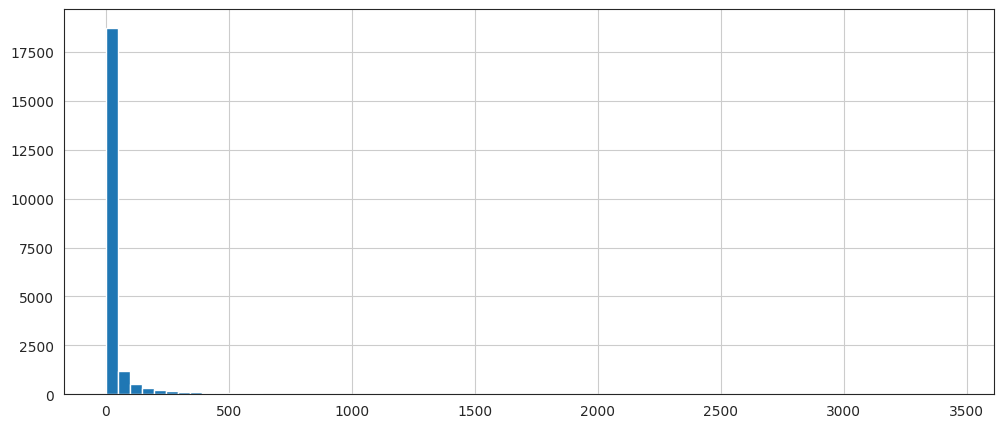

In [28]:
plt.figure(figsize=(12,5))
ratings['num of ratings'].hist(bins=70)

<Axes: >

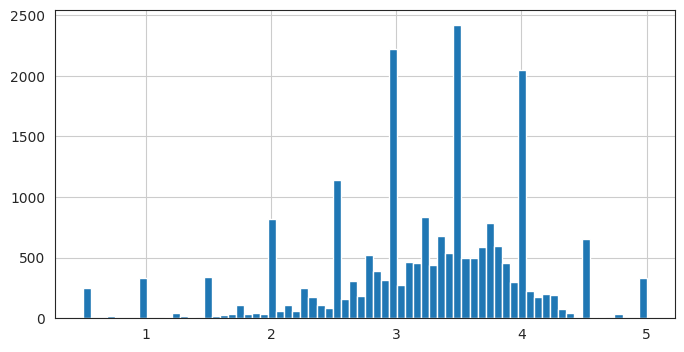

In [29]:
plt.figure(figsize=(8,4))
ratings['rating'].hist(bins=70)

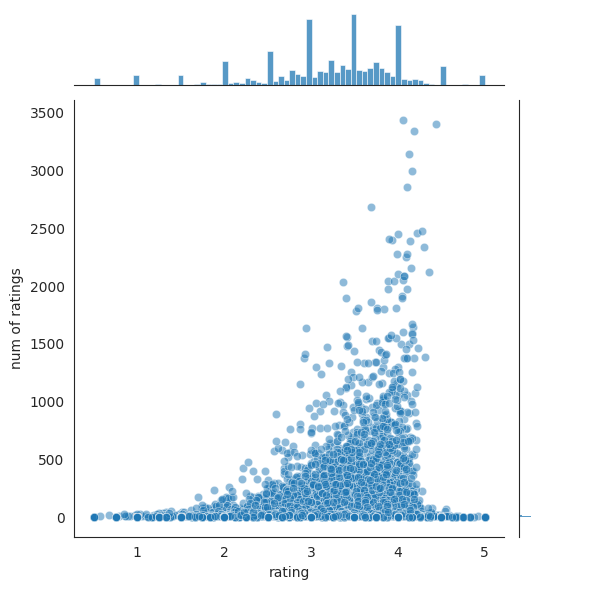

In [30]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

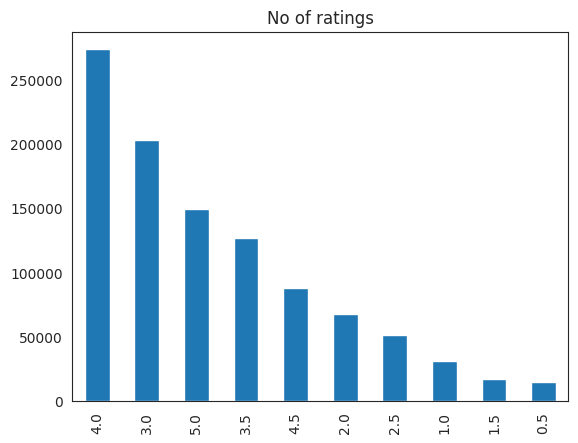

In [39]:
data['rating'].value_counts().plot(kind='bar',title='No of ratings')
plt.show()

In [33]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.059354,3437
"Shawshank Redemption, The (1994)",4.434265,3400
Pulp Fiction (1994),4.180443,3339
"Silence of the Lambs, The (1991)",4.128694,3147
"Matrix, The (1999)",4.163160,2994
Star Wars: Episode IV - A New Hope (1977),4.103846,2860
Jurassic Park (1993),3.685752,2681
Schindler's List (1993),4.276948,2477
Fight Club (1999),4.223963,2458


In [37]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.541667,12
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3


In [46]:
import numpy as np
res = np.array(ratings)

In [47]:
ratings

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.541667,12
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3
...,...,...
Обезьянки и грабители (1985),4.000000,1
Он вам не Димон (2017),3.166667,3
Приключения Домовёнка (1986),3.750000,2


Users and products

In [70]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', electronics_data1['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', electronics_data1['productId'].nunique())

Number of unique users in Raw data =  46554
Number of unique product in Raw data =  3446


Taking the subset of dataset to make it less sparse/ denser

In [71]:
#Check the top 10 users based on ratings
most_rated=electronics_data1.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
A1RPTVW5VEOSI     17
A1ISUNUWG0K02V    16
A1MJMYLRTZ76ZX    16
A7Y6AVS576M03     15
A3MEIR72XKQY88    15
dtype: int64


In [72]:
counts=electronics_data1.userId.value_counts()
electronics_df1_final=electronics_data1[electronics_data1.userId.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(electronics_df1_final))
print('Number of unique users in the final data = ', electronics_df1_final['userId'].nunique())
print('Number of unique products in the final data = ', electronics_df1_final['userId'].nunique())

Number of users who have rated 25 or more items = 219
Number of unique users in the final data =  11
Number of unique products in the final data =  11


spliting the data

In [76]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(electronics_df1_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
17509,AY8Q1X7G96HV5,B00000JSES,4.0
11968,A243HY69GIAHFI,B00000J3Q7,3.0
35533,A1RPTVW5VEOSI,B00003WGP5,5.0
31480,A1NVD0TKNS1GT5,B00002JXFH,4.0
13526,A23ZO1BVFFLGHO,B00000J570,5.0


In [77]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (153, 3)
Shape of testing data:  (66, 3)


In [78]:
#Count of user_id for each unique product as recommendation score
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(30)

,productId,score
0,1400599997,1
1,B00000DM9M,1
2,B00000J061,1
3,B00000J08C,1
4,B00000J1QZ,1
5,B00000J3HB,1
6,B00000J3II,2
7,B00000J3Q7,1
8,B00000J3T1,1
9,B00000J47A,1


In [79]:
#Sort the products on recommendation score
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1])

#Generate a recommendation rank based upon score
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')

#Get the top 5 recommendations
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

,productId,score,rank
87,B00004RC2D,4,1.0
57,B00002SWHH,3,2.0
99,B00004SC3Y,3,3.0
100,B00004SCKA,3,4.0
6,B00000J3II,2,5.0


In [82]:
# Use popularity based recommender model to make predictions
def recommend(user_id):
    user_recommendations = popularity_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['userId'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [83]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))
    print("\n")

The list of recommendations for the userId: 10

     userId   productId  score  rank
87       10  B00004RC2D      4   1.0
57       10  B00002SWHH      3   2.0
99       10  B00004SC3Y      3   3.0
100      10  B00004SCKA      3   4.0
6        10  B00000J3II      2   5.0


The list of recommendations for the userId: 100

     userId   productId  score  rank
87      100  B00004RC2D      4   1.0
57      100  B00002SWHH      3   2.0
99      100  B00004SC3Y      3   3.0
100     100  B00004SCKA      3   4.0
6       100  B00000J3II      2   5.0


The list of recommendations for the userId: 150

     userId   productId  score  rank
87      150  B00004RC2D      4   1.0
57      150  B00002SWHH      3   2.0
99      150  B00004SC3Y      3   3.0
100     150  B00004SCKA      3   4.0
6       150  B00000J3II      2   5.0




In [84]:
electronics_df_CF = pd.concat([train_data, test_data]).reset_index()
electronics_df_CF.head()

,index,userId,productId,ratings
0,17509,AY8Q1X7G96HV5,B00000JSES,4.0
1,11968,A243HY69GIAHFI,B00000J3Q7,3.0
2,35533,A1RPTVW5VEOSI,B00003WGP5,5.0
3,31480,A1NVD0TKNS1GT5,B00002JXFH,4.0
4,13526,A23ZO1BVFFLGHO,B00000J570,5.0


In [85]:
# Matrix with row per 'user' and column per 'item'
pivot_df = electronics_df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [86]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (11, 186)


In [87]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,4


In [88]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


data visulization

<BarContainer object of 118 artists>

Text(0, 0.5, 'Number of books published')

Text(0.5, 0, 'Year of Publication')

Text(0.5, 1.0, 'Number of books published yearly')

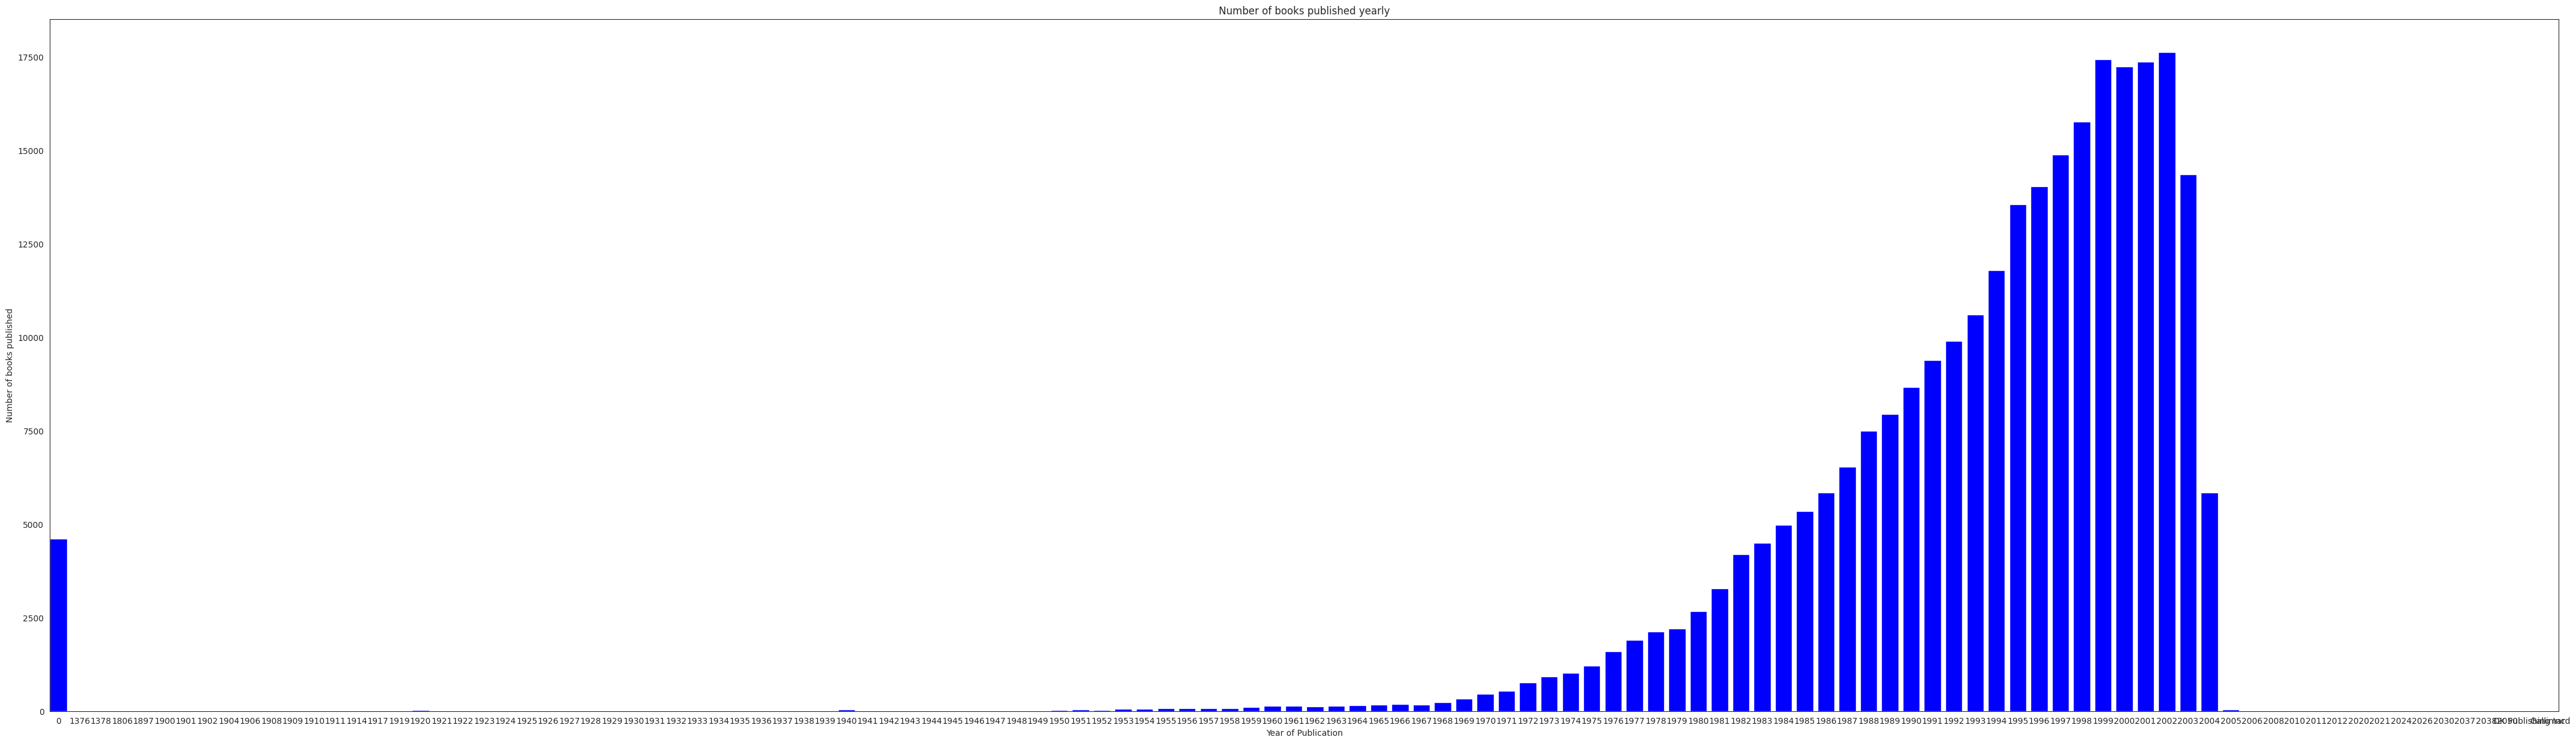

In [149]:
publications = {}
for year in data1['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(54, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='count', ylabel='Book-Author'>

Text(0.5, 1.0, 'No of books by an author (Top 15)')

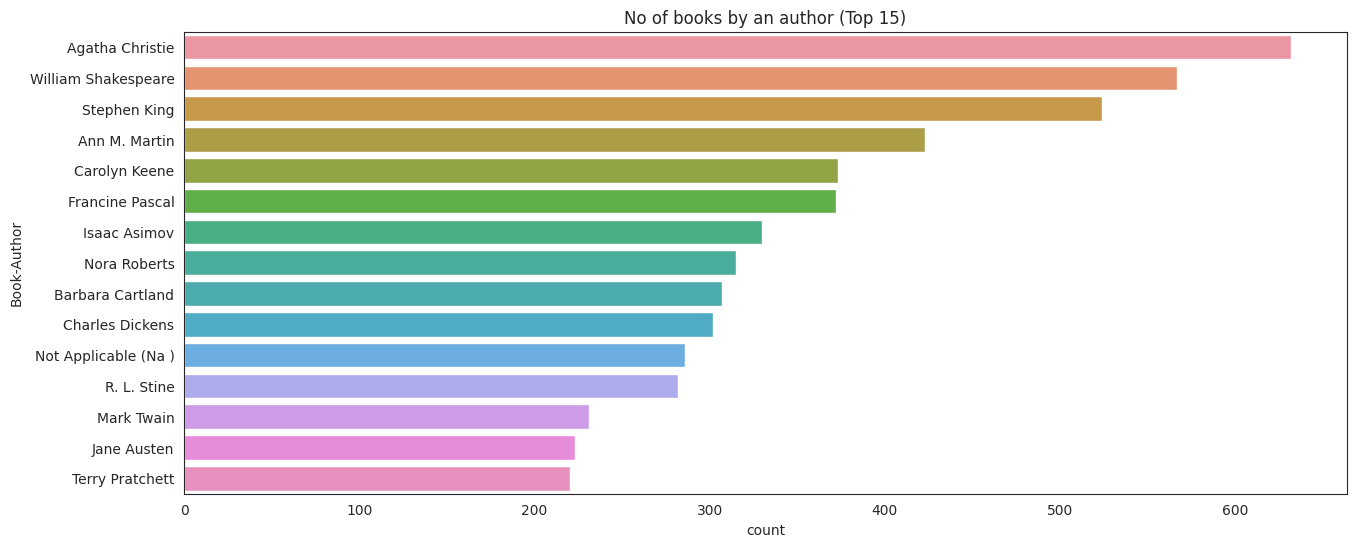

In [151]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=data1,order=data1['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='count', ylabel='Publisher'>

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

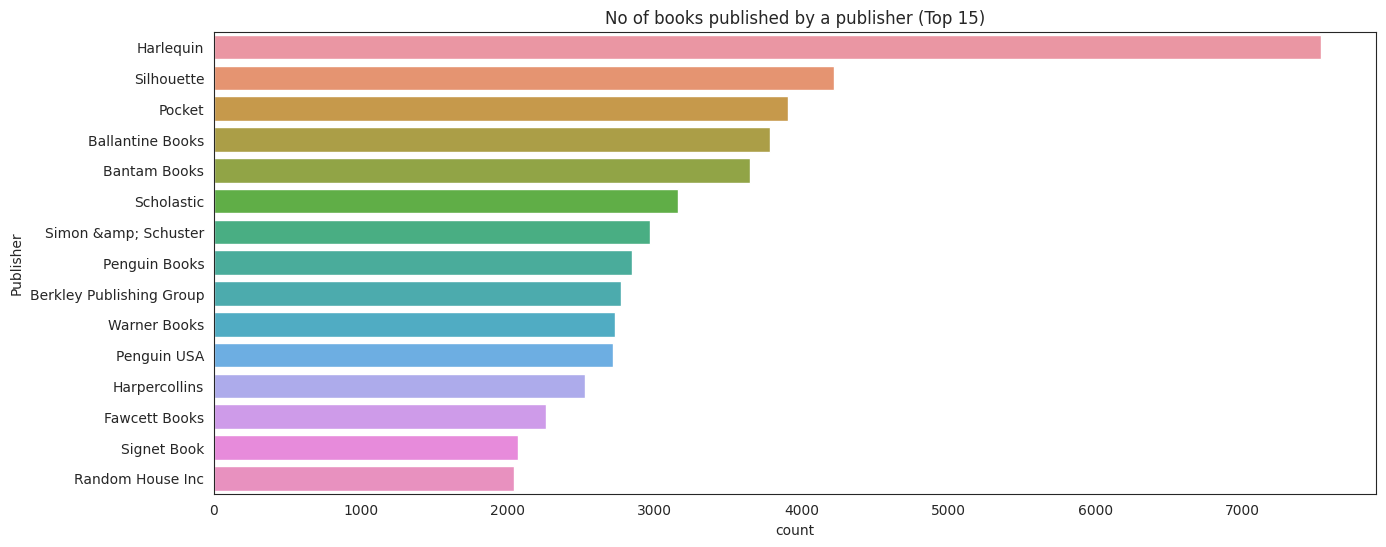

In [152]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=data1,order=data1['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

<Figure size 500x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

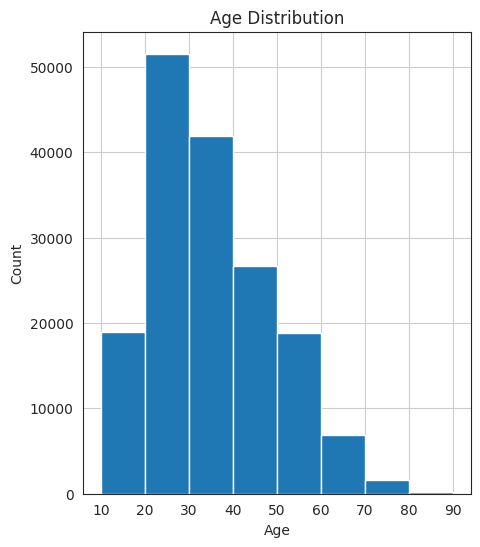

In [160]:
plt.figure(figsize=(5,6))
data3.Age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='count', ylabel='Book-Title'>

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

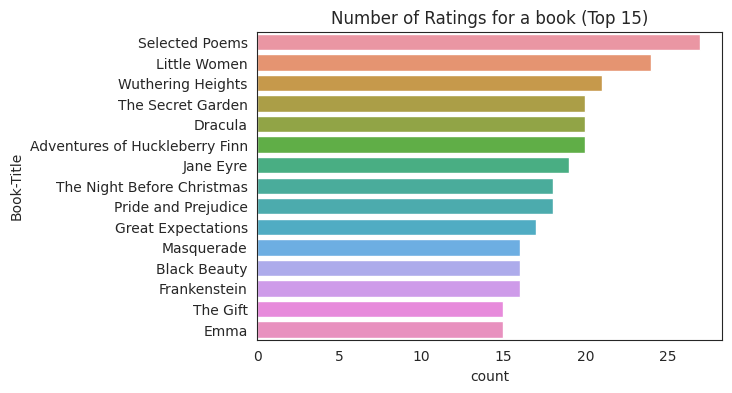

In [170]:
plt.figure(figsize=(6,4))
sns.countplot(y="Book-Title", data=data1, order=data1['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

In [166]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Enter number of books to recommend: 5


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(data1['Book-Title'])
tfidf_matrix.shape

(271360, 578238)